# Objective:
### Predict the price of a car based on features such as Year, model, mileage, Owner, fuel type,Name.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [4]:
a=pd.read_csv("Processed_Cardetails.csv")

In [5]:
a.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,3,3
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0,4


In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  brand          8128 non-null   int64  
 14  model          8128 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 952.6+ KB


In [7]:
a.shape

(8128, 15)

In [8]:
a.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'brand', 'model'],
      dtype='object')

In [9]:
a.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
brand              0
model              0
dtype: int64

<Axes: >

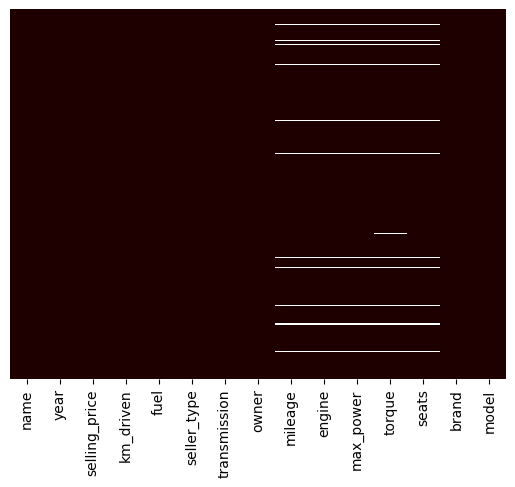

In [10]:
sns.heatmap(a.isnull(),cmap="pink",cbar=False,yticklabels=False)

# Data Cleaning

In [12]:
a.drop(["max_power","torque","brand"],axis=1,inplace=True)      #Dropping the non required columns

In [13]:
print(f"'Mileage'{round((a.mileage.isnull().sum())/len(a)*100,2),'%'}")
print(f"'Engine'{round((a.engine.isnull().sum())/len(a)*100,2),'%'}")
print(f"'Seats'{round((a.seats.isnull().sum())/len(a)*100,2),'%'}")
# Checking the Percentage of null Values

'Mileage'(2.72, '%')
'Engine'(2.72, '%')
'Seats'(2.72, '%')


In [14]:
a.dropna(inplace=True)   # as the null values are less ,i am going to remove it.

In [15]:
a.shape                 # Shape of cleaned Data

(7907, 12)

In [16]:
a.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
seats            0
model            0
dtype: int64

<Axes: >

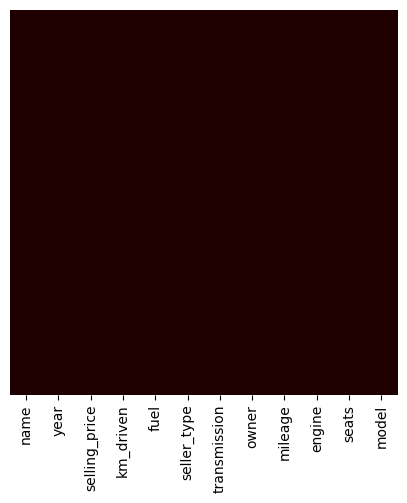

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(a.isnull(),cmap="pink",cbar=False,yticklabels=False)  

In [18]:
a.columns.str.strip()    # Removes the extra space from the columns names.

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'seats', 'model'],
      dtype='object')

# Exploratory Data Analysis

In [20]:
a.describe()

,year,selling_price,km_driven,seats,model
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000,7907.000000
mean,2013.982168,6.497417e+05,6.919256e+04,5.416719,606.666372
std,3.866650,8.135565e+05,5.678976e+04,0.959588,529.787912
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,0.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,187.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,419.000000
75%,2017.000000,6.900000e+05,9.575000e+04,5.000000,930.500000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,2057.000000


In [21]:
a.describe(include="object")

,name,fuel,seller_type,transmission,owner,mileage,engine
count,7907,7907,7907,7907,7907,7907,7907
unique,1983,4,3,2,5,393,121
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC
freq,129,4299,6564,6866,5215,225,1017


In [22]:
a.corr(numeric_only=True)

,year,selling_price,km_driven,seats,model
year,1.000000,0.412268,-0.428434,-0.009144,-0.030611
selling_price,0.412268,1.000000,-0.222196,0.041358,-0.051773
km_driven,-0.428434,-0.222196,1.000000,0.227336,0.030194
seats,-0.009144,0.041358,0.227336,1.000000,0.086345
model,-0.030611,-0.051773,0.030194,0.086345,1.000000


<Axes: ylabel='selling_price'>

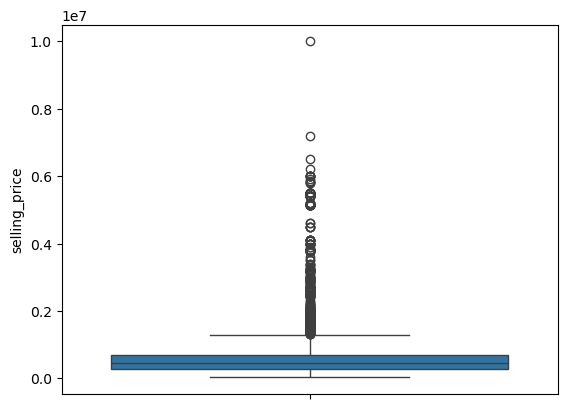

In [23]:
sns.boxplot(y=a["selling_price"])  # Shows the outliners

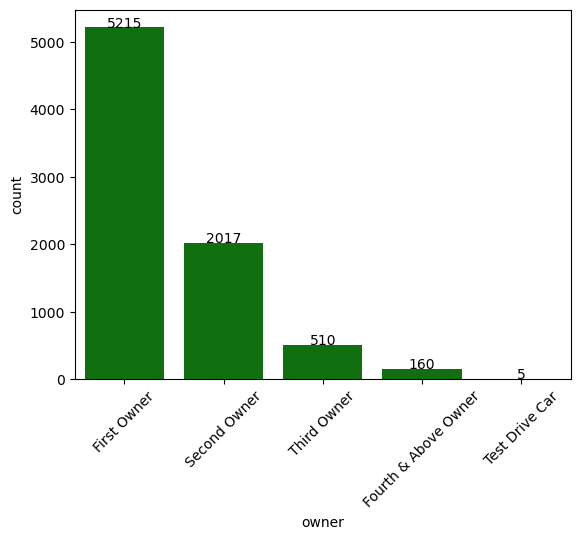

In [24]:
sns.countplot(x="owner",data=a,color="g")
y=a.owner.value_counts()
for i, value in enumerate(y):
    plt.text(i, value + 0.5, str(value), ha='center')     
plt.xticks(rotation=45)
plt.show()     
# shows the count of owner

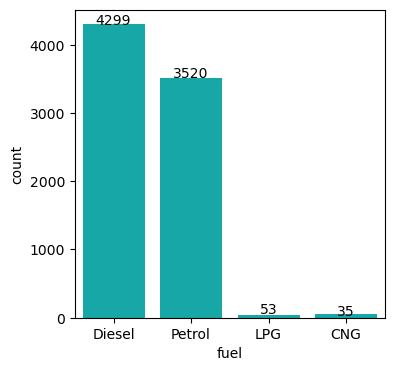

In [130]:
plt.figure(figsize=(4,4))
sns.countplot(x="fuel",data=a,color="c")
y=a.fuel.value_counts()
for i, value in enumerate(y):
    plt.text(i, value + 0.5, str(value), ha='center')

<Figure size 300x300 with 0 Axes>

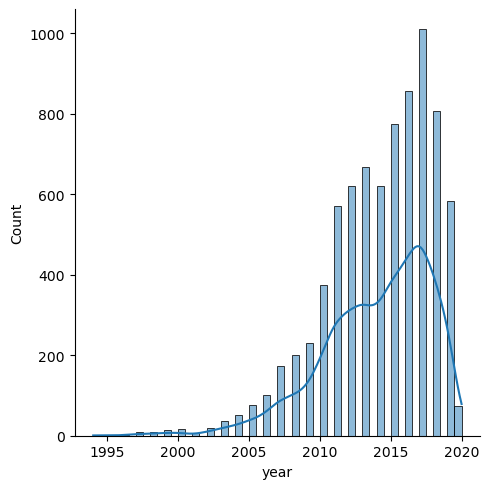

In [134]:
plt.figure(figsize=(3,3))
sns.displot(a["year"],kde=True)
plt.show()


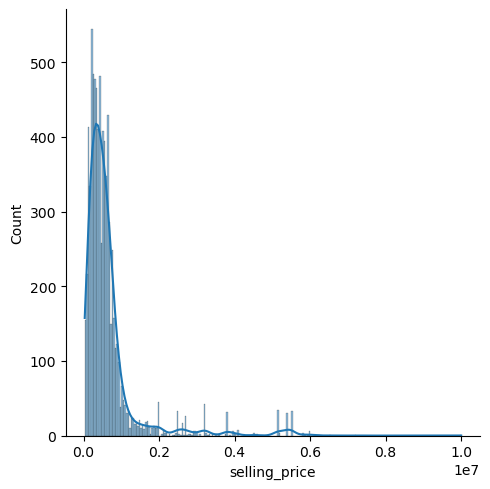

In [27]:
sns.displot(a["selling_price"],kde=True)

<Axes: xlabel='year', ylabel='km_driven'>

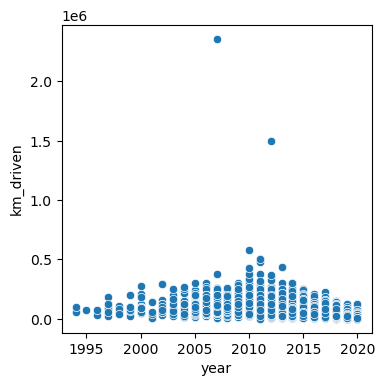

In [136]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=a["year"],y=a["km_driven"])

<Axes: xlabel='year', ylabel='selling_price'>

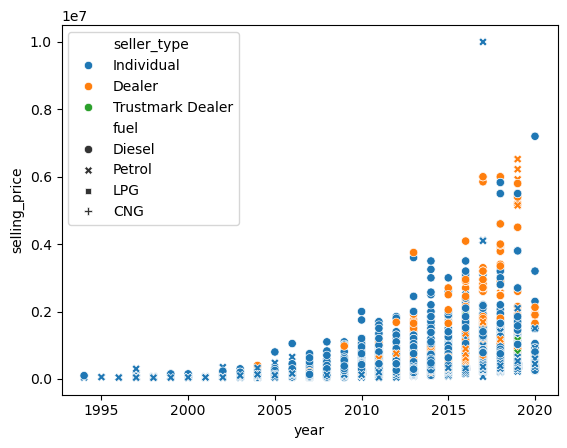

In [140]:

sns.scatterplot(x=a["year"],y=a["selling_price"],data=a,hue="seller_type",style="fuel")

<Axes: xlabel='year', ylabel='selling_price'>

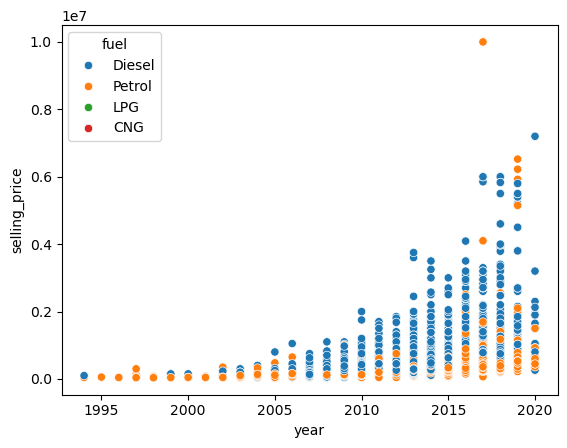

In [144]:

sns.scatterplot(x=a["year"],y=a["selling_price"],data=a,hue="fuel")

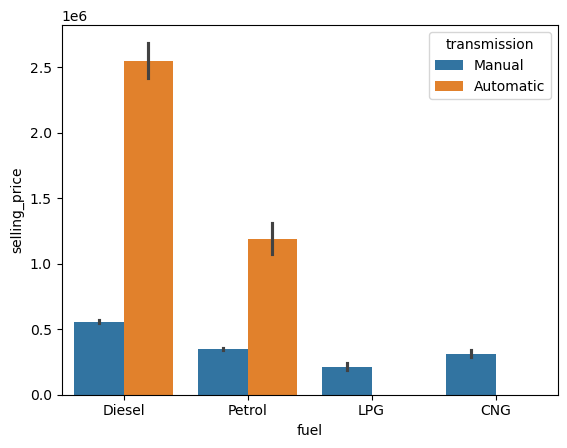

In [152]:

sns.barplot(x="fuel",y="selling_price",data=a,hue="transmission")
plt.show()

In [32]:
pd.crosstab(a["seller_type"],a["year"])

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
seller_type,,,,,,,,,,,,,,,,,,,,,
Dealer,0,0,0,0,0,0,0,0,1,0,...,36,52,74,63,84,141,232,213,161,9
Individual,2,1,2,9,9,14,16,6,18,37,...,534,568,534,554,690,647,746,585,359,65
Trustmark Dealer,0,0,0,0,0,0,0,0,0,0,...,0,1,60,3,1,68,32,8,63,0


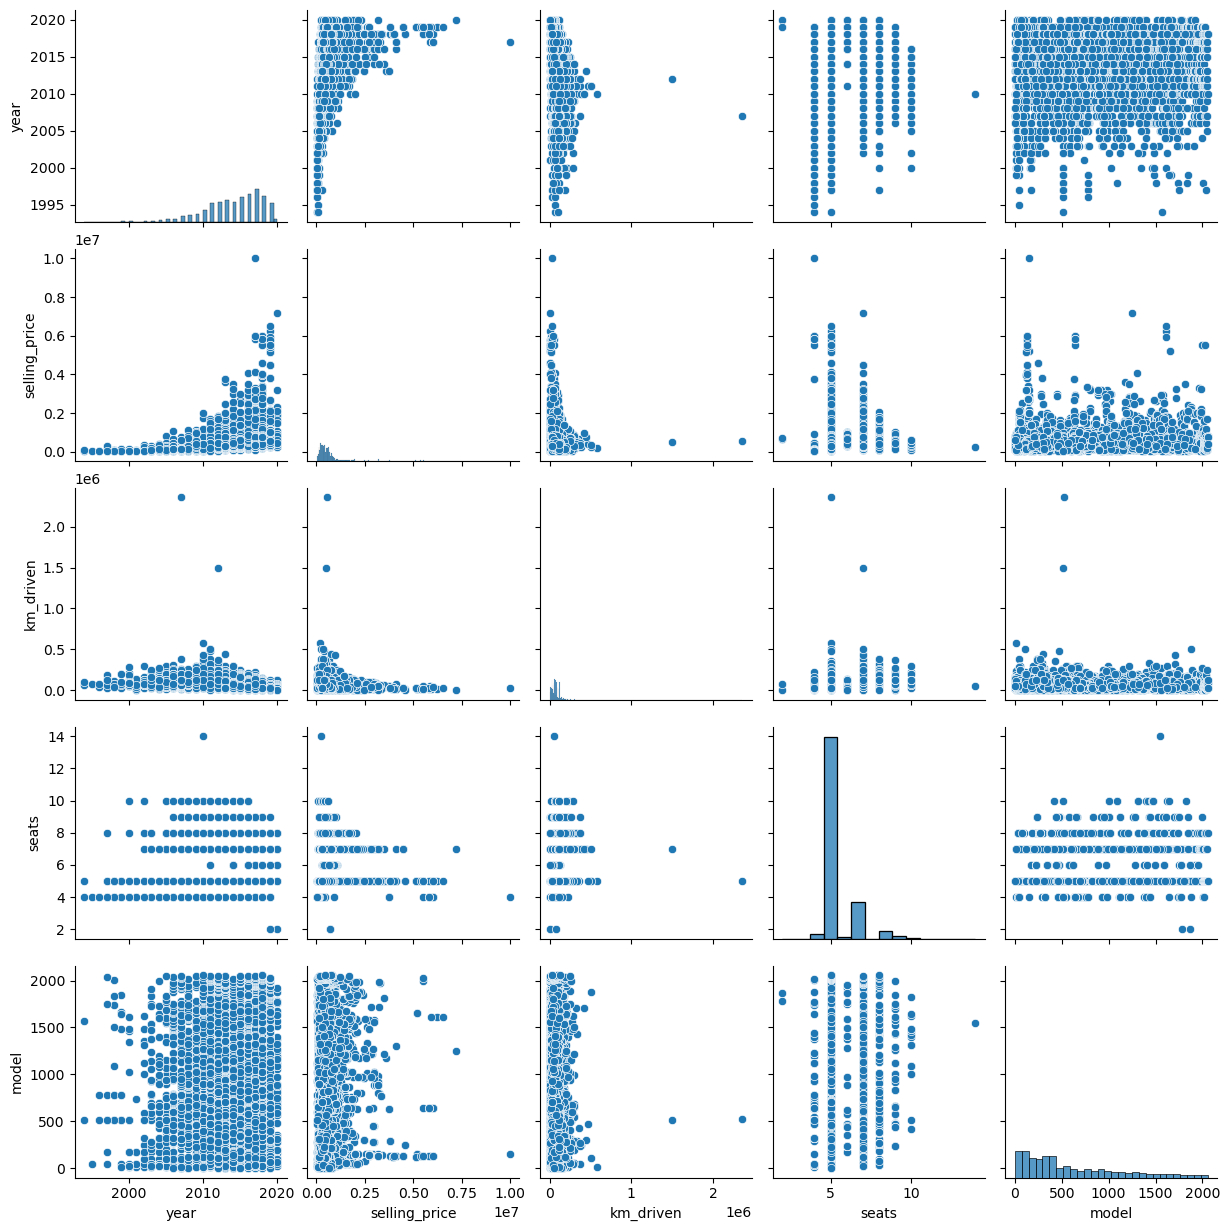

In [33]:
sns.pairplot(a)

# Split the Data
seperate the Categorical and numeric columns

#### Categorical Table

In [36]:
a_cat=a.select_dtypes(include=object)

In [37]:
a_cat

,name,fuel,seller_type,transmission,owner,mileage,engine
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC


#### Numerical Table

In [39]:
a_num=a.select_dtypes(include=[np.number])

In [40]:
a_num

,year,selling_price,km_driven,seats,model
0,2014,450000,145500,5.0,0
1,2014,370000,120000,5.0,1
2,2006,158000,140000,5.0,2
3,2010,225000,127000,5.0,3
4,2007,130000,120000,5.0,4
...,...,...,...,...,...
8123,2013,320000,110000,5.0,187
8124,2007,135000,119000,5.0,307
8125,2009,382000,120000,5.0,223
8126,2013,290000,25000,5.0,699


#### Converting the Categorical values in to numeric

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [44]:
a_cat=a_cat.apply(le.fit_transform)

In [45]:
a_cat

,name,fuel,seller_type,transmission,owner,mileage,engine
0,1250,1,1,1,0,335,13
1,1547,1,1,1,2,284,36
2,375,3,1,1,4,180,35
3,743,1,1,1,0,327,24
4,1291,3,1,1,0,136,14
...,...,...,...,...,...,...,...
8123,733,3,1,1,0,202,10
8124,618,1,1,1,1,154,32
8125,1262,1,1,1,0,222,13
8126,1634,1,1,1,0,337,24


#### Adding categorical(converted to numeric) table and Numeric table

In [47]:
aa=pd.concat([a_cat,a_num],axis=1)

In [48]:
aa

,name,fuel,seller_type,transmission,owner,mileage,engine,year,selling_price,km_driven,seats,model
0,1250,1,1,1,0,335,13,2014,450000,145500,5.0,0
1,1547,1,1,1,2,284,36,2014,370000,120000,5.0,1
2,375,3,1,1,4,180,35,2006,158000,140000,5.0,2
3,743,1,1,1,0,327,24,2010,225000,127000,5.0,3
4,1291,3,1,1,0,136,14,2007,130000,120000,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,733,3,1,1,0,202,10,2013,320000,110000,5.0,187
8124,618,1,1,1,1,154,32,2007,135000,119000,5.0,307
8125,1262,1,1,1,0,222,13,2009,382000,120000,5.0,223
8126,1634,1,1,1,0,337,24,2013,290000,25000,5.0,699


#### Seperating The X (Features), and Y (labels) From the Table

In [50]:
x=aa.drop(["selling_price"],axis=1)

In [51]:
y=aa.iloc[:,[8]]

#### Seperating the Train and Test Data  from the table 70% Training and 30% Test data 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [55]:
x_train.shape

(5534, 11)

In [56]:
y_test.shape

(2373, 1)

#### Model Selection

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr=LinearRegression()

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
print("Score",lr.score(x_train,y_train)*100)

Score 54.03313119594295


#### As we got the less score so we will select another model 

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()

In [66]:
DT = DecisionTreeRegressor(random_state=42)

In [67]:
DT.fit(x_train,y_train)


DecisionTreeRegressor(random_state=42)

In [68]:
DT.score(x_train,y_train)*100

99.98563807538426

In [69]:
y_pred=DT.predict(x_test)

In [70]:
DT.predict([[618,1,1,1,1,154,32,2007,119000,5.0,307]])

C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([135000.])

#### Decision tree Give goood result

#### Final Visualisation Of Actual and predicted Values

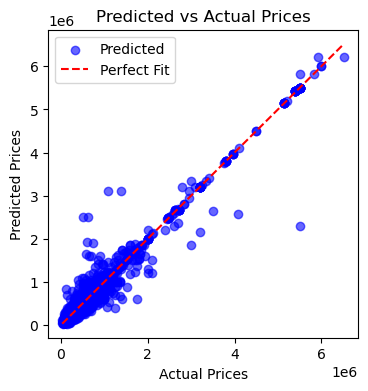

In [154]:
y_test = np.array(y_test, dtype=float)
y_pred = np.array(y_pred, dtype=float)

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")

# Line for perfect fit
y_test_range = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(y_test_range, y_test_range, '--', color='red', label='Perfect Fit')

plt.legend()
plt.show()
